Please first note that this ipynb file contains outcomes only for our decision tree classifier, but not for random forest and ada-boost classifier. 

We originally had the three models in three separate ipynb files (successfully ran and seen outcomes), however for submission we wanted to have them all in one file so we tried to rerun everything again in this file. However, the gridsearch was taking too long for random forest classifier, (which is also one of the major disadvantages of random forest models), that we are including just the codes, but not the outcomes for random forest and ada-boost. Nevertheless, you would be able to infer what the outcomes would look like from looking at the outcomes of the decision tree classifier, and also, the outcomes of random forest and ada-boost have been documented in our final report.

# Data Preparation
In this section I download the reduced version of our dataset and take some data pre-processing steps before training the models.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
# Read the data
df = pd.read_csv("crime_reduced.csv")

In [3]:
# Drop these two variables as they are not so relevant in the prediction. 
# 'Arrest': whether the crime resulted in crime 
# 'Domestic': whether the crime was a domestic crime 
df.drop(['Arrest', 'Domestic'], axis=1, inplace=True)

In [4]:
# Check the list of columns
df.columns.to_list()

['Unnamed: 0',
 'Primary Type',
 'Median Age',
 'Median Income',
 'Percent White',
 'Percent Black',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'TMIN',
 'day',
 'Location Description_ANIMAL HOSPITAL',
 'Location Description_BANK',
 'Location Description_BAR OR TAVERN',
 'Location Description_CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
 'Location Description_COMMERCIAL / BUSINESS OFFICE',
 'Location Description_CONSTRUCTION SITE',
 'Location Description_CTA PROPERTIES',
 'Location Description_DEPARTMENT STORE',
 'Location Description_GROCERY FOOD STORE',
 'Location Description_HOSPITAL BUILDING/GROUNDS',
 'Location Description_NURSING HOME/RETIREMENT HOME',
 'Location Description_OTHER',
 'Location Description_PARK PROPERTY',
 'Location Description_PARKING LOT/GARAGE(NON.RESID.)',
 'Location Description_RESIDENCE',
 'Location Description_RESIDENCE - YARD (FRONT / BACK)',
 'Location Description_RESTAURANT',
 'Location Description_SAVINGS AND LOAN',
 'Location Description_SCHOOL',
 'Location Descriptio

In [5]:
# Convert the 'day' column's string values 'weekday' and 'weekend' to 0's and 1's. 
def day(row):
    if row['day'] == 'WEEKDAY':
        return 0
    if row['day'] == 'WEEKEND':
        return 1

In [6]:
df['day'] = df.apply (lambda row: day(row), axis=1)

In [7]:
# Convert the 'Primary type' column's string values 'NON VIOLENT CRIME' and 'VIOLENT CRIME' to 0's and 1's. 
def label_target(row):
    if row['Primary Type'] == 'NON VIOLENT CRIME':
        return 0
    if row['Primary Type'] == 'VIOLENT CRIME':
        return 1

In [8]:
df['label_target'] = df.apply (lambda row: label_target(row), axis=1)

In [9]:
# Select features and target variables 
feature_cols = df.columns.to_list()[2:-1]
X = df[feature_cols]
y = df['label_target']

In [10]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Check if there are NaN values
X_train.isna().sum()

Median Age          0
Median Income    4057
Percent White     193
Percent Black     193
PRCP              564
                 ... 
month_5             0
month_6             0
month_7             0
month_8             0
month_9             0
Length: 169, dtype: int64

In [12]:
# Fill the NaN values in the training set with median value of the repsective columns
X_train.fillna(X_train.median(), inplace=True)

/Users/eunjungcho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
# Check there are no NaNs anymore 
X_train.isna().sum()

Median Age       0
Median Income    0
Percent White    0
Percent Black    0
PRCP             0
                ..
month_5          0
month_6          0
month_7          0
month_8          0
month_9          0
Length: 169, dtype: int64

In [14]:
# Fill the NaN values in the testing set with median value of the repsective columns in the training set
X_test.fillna(X_train.median(), inplace=True)

In [15]:
# Check there are no NaNs anymore 
X_test.isna().sum()

Median Age       0
Median Income    0
Percent White    0
Percent Black    0
PRCP             0
                ..
month_5          0
month_6          0
month_7          0
month_8          0
month_9          0
Length: 169, dtype: int64

# Decision Tree Classifier
Here I train a decision tree model using various parameters, to choose the parameter combination that produces the highest accuracy score. With the identified combination I refit the model, and evaluate using confusion matrix and feature importances. 

In [16]:
# Hyperparameter tuning with the following parameters 

tree_para = {'criterion': ['gini', 'entropy'],
             'max_depth': [3,5,7,9,11,13],
             'min_samples_split': [2,5,10]}

scorers = {'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)}

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_para, cv=10, 
                   scoring=scorers,refit=False)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
       

In [17]:
# Document the results into a pandas dataframe 
cv_results_df = pd.DataFrame(clf.cv_results_)

In [18]:
results = cv_results_df[['param_criterion', 'param_max_depth', 'param_min_samples_split', 
                         'mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score']]

In [19]:
results

,param_criterion,param_max_depth,param_min_samples_split,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score
0,gini,3,2,0.609328,0.281698,0.624280
1,gini,3,5,0.609328,0.281698,0.624280
2,gini,3,10,0.609328,0.281698,0.624280
3,gini,5,2,0.594134,0.359022,0.629598
4,gini,5,5,0.594134,0.359022,0.629598
5,gini,5,10,0.594134,0.359022,0.629598
6,gini,7,2,0.564435,0.529235,0.630127
7,gini,7,5,0.564435,0.529235,0.630127
8,gini,7,10,0.564405,0.529282,0.630107
9,gini,9,2,0.584461,0.459851,0.637373


In [20]:
# Identify the parameter combination that produces the highest accuracy score
results[results['mean_test_accuracy_score']==max(results['mean_test_accuracy_score'])]

,param_criterion,param_max_depth,param_min_samples_split,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score
10,gini,9,5,0.58472,0.460015,0.63754


In [21]:
# Refit the tree with the identified combination
dt = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=5)
model = dt.fit(X_train, y_train)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.653627 to fit



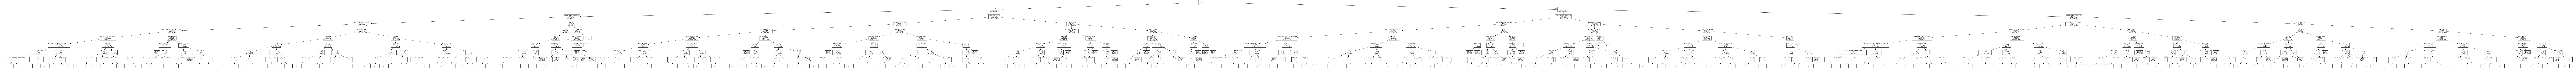

In [22]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X_train.columns.values)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
# Show and plot the 12 most important features in this model 
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(12)

,feature,importance
2,Percent White,0.319868
1,Median Income,0.133229
31,Location Description_STREET,0.114395
28,Location Description_SCHOOL,0.063314
24,Location Description_RESIDENCE,0.043658
3,Percent Black,0.030097
22,Location Description_PARK PROPERTY,0.025775
16,Location Description_CTA PROPERTIES,0.020391
0,Median Age,0.019921
9,day,0.018911


[Text(0, 0, 'Percent White'),
 Text(0, 0, 'Median Income'),
 Text(0, 0, 'Location Description_STREET'),
 Text(0, 0, 'Location Description_SCHOOL'),
 Text(0, 0, 'Location Description_RESIDENCE'),
 Text(0, 0, 'Percent Black'),
 Text(0, 0, 'Location Description_PARK PROPERTY'),
 Text(0, 0, 'Location Description_CTA PROPERTIES'),
 Text(0, 0, 'Median Age'),
 Text(0, 0, 'day'),
 Text(0, 0, 'TMIN'),
 Text(0, 0, 'hour_12')]

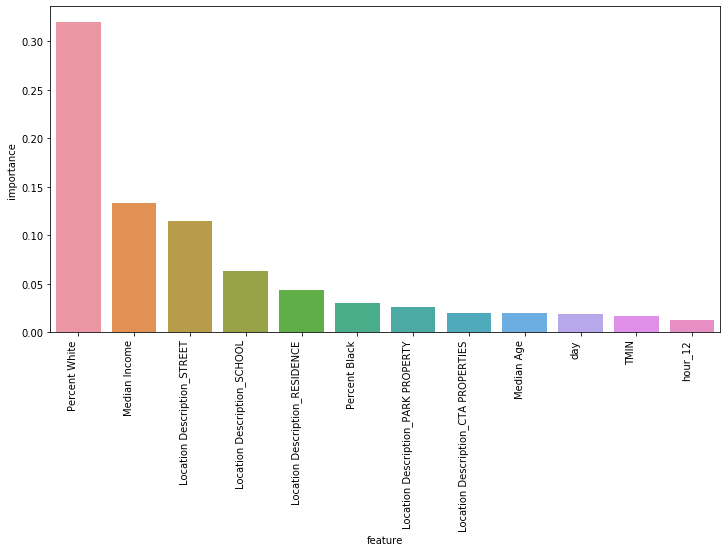

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
plot = sns.barplot(x=fi.feature[:12], y=fi.importance[:12], ax=ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [25]:
y_pred = dt.predict(X_test)

In [ ]:
# Plot confusion matrix 
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test, values_format='g')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72     14964
           1       0.59      0.46      0.52     10565

    accuracy                           0.64     25529
   macro avg       0.63      0.62      0.62     25529
weighted avg       0.64      0.64      0.64     25529



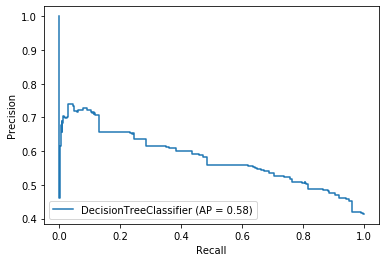

In [28]:
# Plot Precision-Recall curve
dt_plot = plot_precision_recall_curve(dt, X_test, y_test)
plt.show()

# Random Forest Classifier
Random forest is an ensemble model using bagging as its ensemble method, and decision tree as its individual model. For each candidate in the test set, Random Forest uses the class with the majority vote as this candidate’s final prediction.

Just like the decision tree classifier, here I train the random forest model using various parameters, to choose the parameter combination that produces the highest accuracy score. With the identified combination I refit the model, and evaluate using confusion matrix and feature importances.

In [ ]:
forest_para = {'n_estimators': [100, 1000, 5000],
             'criterion': ['gini', 'entropy'],
             'max_depth': [3,5,7,9,11,13],
             'min_samples_split': [2,5,10]}

scorers = {'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)}

rf = GridSearchCV(RandomForestClassifier(random_state=0, class_weight="balanced"), forest_para, cv=10, 
                   scoring=scorers,refit=False)

rf.fit(X_train, y_train)

In [ ]:
cv_results_2_df = pd.DataFrame(rf.cv_results_)

In [ ]:
cv_results_2_df

In [ ]:
results_2 = cv_results_2_df[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
                         'mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score']]

In [ ]:
results_2

In [ ]:
results_2[results_2['mean_test_accuracy_score']==max(results_2['mean_test_accuracy_score'])]

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=10, n_estimators=5000)

In [ ]:
model_2 = rfc.fit(X_train, y_train)

In [ ]:
fi_2 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_2.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_2.head(12)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plot_2 = sns.barplot(x=fi_2.feature[:12], y=fi_2.importance[:12], ax=ax)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90, horizontalalignment='right')

In [ ]:
y_pred_2 = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_2))
plot_confusion_matrix(rfc ,X_test, y_test)

In [ ]:
print (classification_report(y_test, y_pred_2))

In [ ]:
plot_precision_recall_curve(rfc, X_test, y_test)

In [ ]:
# Plot ROC curve
plot_roc_curve(rfc,X_test,y_test)

# Ada-Boost Classifier
AdaBoost is a boosting ensemble model that works especially well with decision trees. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points - AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

Just like before, I try different paramater values to choose the one with the highest accuracy score, and refit the model, plot confusion matrix, precision-recall curves and feature importances.

In [ ]:
tree_para = {'n_estimators': [100, 1000, 5000]}

scorers = {'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)}

clf2 = GridSearchCV(AdaBoostClassifier(random_state=0), tree_para, cv=10, 
                   scoring=scorers,refit=False)

clf2.fit(X_train, y_train)

In [ ]:
cv_results_3_df = pd.DataFrame(clf2.cv_results_)

In [ ]:
cv_results_3_df

In [ ]:
results_3 = cv_results_3_df[['param_n_estimators','mean_test_precision_score', 
                             'mean_test_recall_score', 'mean_test_accuracy_score']]

In [ ]:
results_3

In [ ]:
results_3[results_3['mean_test_accuracy_score']==max(results_3['mean_test_accuracy_score'])]

In [ ]:
ab = AdaBoostClassifier(n_estimators=100)

In [ ]:
model_3 = ab.fit(X_train, y_train)

In [ ]:
fi_3 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_3.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_3.head(12)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plot_3 = sns.barplot(x=fi_3.feature[:12], y=fi_3.importance[:12], ax=ax)
plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90, horizontalalignment='right')

In [ ]:
y_pred_3 = ab.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_3))
plot_confusion_matrix(ab ,X_test, y_test)

In [ ]:
print (classification_report(y_test, y_pred_3))

In [ ]:
plot_precision_recall_curve(ab, X_test, y_test)